In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

593

In [6]:
# Import the dependency requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | marsabit
Processing Record 2 of Set 1 | palmer
Processing Record 3 of Set 1 | santa cruz
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | pangnirtung
Processing Record 6 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | banjar
Processing Record 9 of Set 1 | handan
Processing Record 10 of Set 1 | lavrentiya
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | chaman
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | kuusamo
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | bodaybo
Processing Record 21 of Set 1 | ilulissat
Pro

Processing Record 35 of Set 4 | reyes
Processing Record 36 of Set 4 | plettenberg bay
Processing Record 37 of Set 4 | sitka
Processing Record 38 of Set 4 | hasaki
Processing Record 39 of Set 4 | torbay
Processing Record 40 of Set 4 | bubaque
Processing Record 41 of Set 4 | fort nelson
Processing Record 42 of Set 4 | iracoubo
Processing Record 43 of Set 4 | maputo
Processing Record 44 of Set 4 | carutapera
Processing Record 45 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 46 of Set 4 | oudtshoorn
Processing Record 47 of Set 4 | port hardy
Processing Record 48 of Set 4 | chuy
Processing Record 49 of Set 4 | esperance
Processing Record 50 of Set 4 | kawalu
Processing Record 1 of Set 5 | marsh harbour
Processing Record 2 of Set 5 | la ronge
Processing Record 3 of Set 5 | miraflores
Processing Record 4 of Set 5 | overyata
Processing Record 5 of Set 5 | dubbo
Processing Record 6 of Set 5 | samarai
Processing Record 7 of Set 5 | laguna
Processing Record 8 of Set 5 | khat

Processing Record 28 of Set 8 | opobo
City not found. Skipping...
Processing Record 29 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 30 of Set 8 | cienaga
Processing Record 31 of Set 8 | ponta do sol
Processing Record 32 of Set 8 | bosaso
Processing Record 33 of Set 8 | muli
Processing Record 34 of Set 8 | cairns
Processing Record 35 of Set 8 | faanui
Processing Record 36 of Set 8 | puerto escondido
Processing Record 37 of Set 8 | beloha
Processing Record 38 of Set 8 | caravelas
Processing Record 39 of Set 8 | ji-parana
City not found. Skipping...
Processing Record 40 of Set 8 | takoradi
Processing Record 41 of Set 8 | namibe
Processing Record 42 of Set 8 | bairiki
Processing Record 43 of Set 8 | honningsvag
Processing Record 44 of Set 8 | bargal
City not found. Skipping...
Processing Record 45 of Set 8 | sibolga
Processing Record 46 of Set 8 | samusu
City not found. Skipping...
Processing Record 47 of Set 8 | calabozo
Processing Record 48 of Set 8 | coos bay
Proces

Processing Record 14 of Set 12 | swan hill
Processing Record 15 of Set 12 | faya
Processing Record 16 of Set 12 | porbandar
Processing Record 17 of Set 12 | douglas
Processing Record 18 of Set 12 | gunnedah
Processing Record 19 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 20 of Set 12 | saleaula
City not found. Skipping...
Processing Record 21 of Set 12 | pontianak
Processing Record 22 of Set 12 | orsha
Processing Record 23 of Set 12 | xinzhi
Processing Record 24 of Set 12 | san andres
Processing Record 25 of Set 12 | sao joao da barra
Processing Record 26 of Set 12 | mahadday weyne
City not found. Skipping...
Processing Record 27 of Set 12 | tignere
Processing Record 28 of Set 12 | sungairaya
Processing Record 29 of Set 12 | doctor pedro p. pena
City not found. Skipping...
Processing Record 30 of Set 12 | hofn
Processing Record 31 of Set 12 | mahalapye
Processing Record 32 of Set 12 | mezen
Processing Record 33 of Set 12 | charcas
Processing Record 34 of Set 12 |

In [10]:
# Tally the number of cities.
len(city_data)

543

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Marsabit,2.3284,37.9899,59.00,66,67,19.46,KE,2021-07-31 00:12:43
1,Palmer,42.1584,-72.3287,71.47,53,20,1.99,US,2021-07-31 00:12:44
2,Santa Cruz,-17.8000,-63.1667,60.26,48,79,4.61,BO,2021-07-31 00:12:44
3,Ushuaia,-54.8000,-68.3000,37.06,70,40,3.44,AR,2021-07-31 00:11:29
4,Pangnirtung,66.1451,-65.7125,58.86,60,95,2.42,CA,2021-07-31 00:12:45


In [12]:
# Reorder the columns so they are easier to read. 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign city data df the new column order.
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Marsabit,KE,2021-07-31 00:12:43,2.3284,37.9899,59.00,66,67,19.46
1,Palmer,US,2021-07-31 00:12:44,42.1584,-72.3287,71.47,53,20,1.99
2,Santa Cruz,BO,2021-07-31 00:12:44,-17.8000,-63.1667,60.26,48,79,4.61
3,Ushuaia,AR,2021-07-31 00:11:29,-54.8000,-68.3000,37.06,70,40,3.44
4,Pangnirtung,CA,2021-07-31 00:12:45,66.1451,-65.7125,58.86,60,95,2.42


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

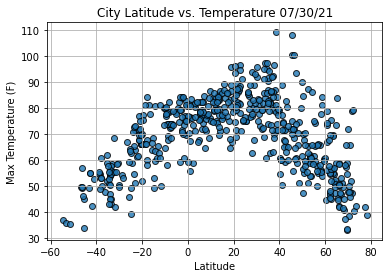

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

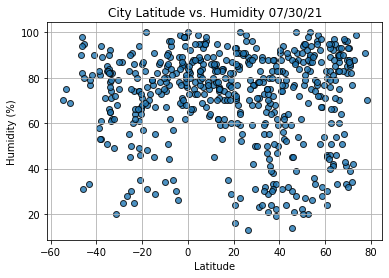

In [17]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

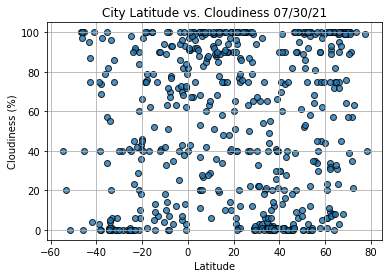

In [18]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

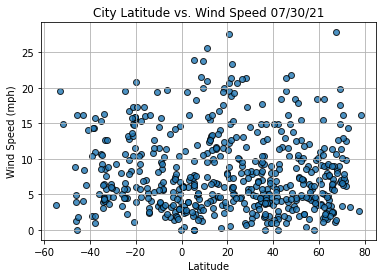

In [19]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
# Get a specific row from our city data df. 
index13 = city_data_df.loc[13]

In [22]:
index13

City                    Jamestown
Country                        US
Date          2021-07-31 00:10:13
Lat                        42.097
Lng                      -79.2353
Max Temp                    67.59
Humidity                       63
Cloudiness                      1
Wind Speed                   1.54
Name: 13, dtype: object

In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [25]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Marsabit,KE,2021-07-31 00:12:43,2.3284,37.9899,59.00,66,67,19.46
1,Palmer,US,2021-07-31 00:12:44,42.1584,-72.3287,71.47,53,20,1.99
4,Pangnirtung,CA,2021-07-31 00:12:45,66.1451,-65.7125,58.86,60,95,2.42
7,Handan,CN,2021-07-31 00:12:46,36.6006,114.4678,81.25,83,1,3.71
8,Lavrentiya,RU,2021-07-31 00:12:18,65.5833,-171.0000,45.54,90,99,6.08


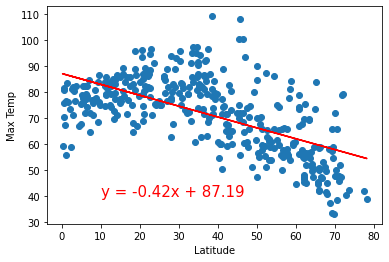

In [27]:
# Perform linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [28]:
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Santa Cruz,BO,2021-07-31 00:12:44,-17.8000,-63.1667,60.26,48,79,4.61
3,Ushuaia,AR,2021-07-31 00:11:29,-54.8000,-68.3000,37.06,70,40,3.44
5,New Norfolk,AU,2021-07-31 00:12:45,-42.7826,147.0587,54.91,77,87,8.43
6,Banjar,ID,2021-07-31 00:12:46,-8.1900,114.9675,78.66,77,7,5.57
9,Rikitea,PF,2021-07-31 00:12:47,-23.1203,-134.9692,71.60,82,91,12.80


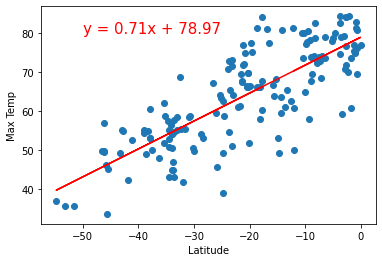

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80)) 

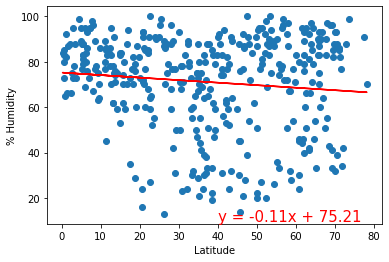

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

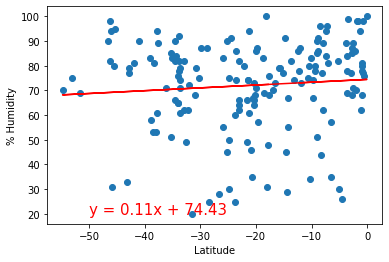

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\
                        for % Humidity', '% Humidity',(-50,20))

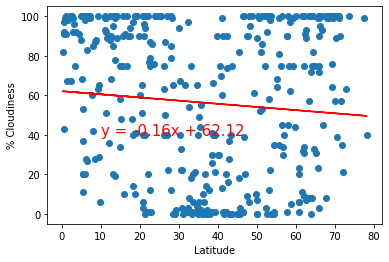

In [39]:
# Perform linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', '% Cloudiness',(10,40))

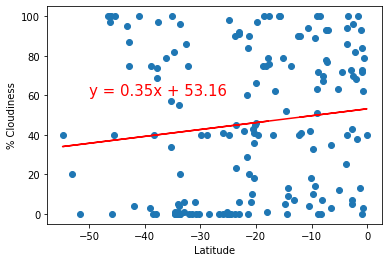

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\
                        for % Cloudiness', '% Cloudiness',(-50,60))

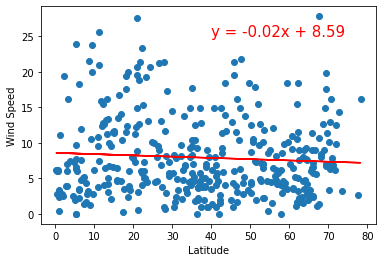

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\
                        for Wind Speed', 'Wind Speed',(40,25))

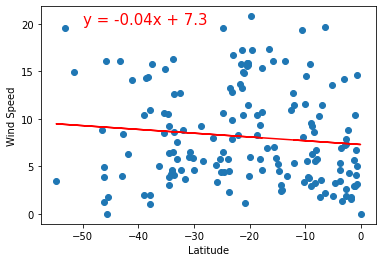

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))